In [62]:
import pandas as pd
import numpy as np
import math
import re
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [63]:
df = pd.read_csv('combined_data_1.txt', names = ["Cust_Id","Rating"],usecols = [0,1] ,nrows=2000)
tqdm.pandas()
df['Rating'] = df['Rating'].astype(float)
last_row_index=df.shape[0]

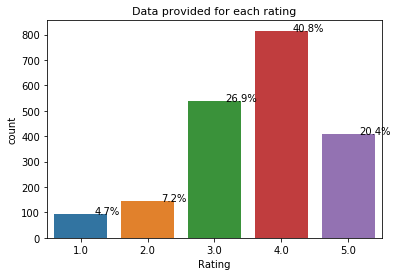

In [64]:

#view data

ax = sns.countplot(x="Rating", data=df)
plt.title('Data provided for each rating', fontsize=11)
total = float(len(df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [65]:
customer_df = df[pd.notnull(df['Rating'])]
print(customer_df.shape)
print(df.shape)

(1997, 2)
(2000, 2)


In [66]:
# adding moviesid column in customer_df
movie_np = np.array([])
# get movie count
movie_count = df.isnull().sum()[1]
print('total no of movies',movie_count)
#get all the movie id where Rating column value is none
df_nan = pd.DataFrame(pd.isnull(df.Rating))
df_nan = df_nan[df_nan['Rating'] == True]
df_nan = df_nan.reset_index()
movie_id_collection=df_nan['index'].to_numpy()
print('row containing movieid',movie_id_collection)

total no of movies 3
row containing movieid [  0 548 694]


In [67]:
mov_ar=df.loc[movie_id_collection].to_numpy()
mov_ar=np.delete(mov_ar,[1],1)
print(mov_ar)

[['1:']
 ['2:']
 ['3:']]


In [68]:
#replace values in movie_np with actual movie ID
start=0
end=0
for i in tqdm(range(len(movie_id_collection))):
    row_id=movie_id_collection[i]
    movie_id=mov_ar[i][0]
    movie_id=movie_id.strip(':')
    
    start=movie_id_collection[i]+1
    if i!=len(movie_id_collection)-1:
        end=movie_id_collection[i+1]-1
    else:
        end=last_row_index-1
    movie=np.array([movie_id]*(end-start+1))
    movie_np=np.append( movie_np , movie )

100%|██████████| 3/3 [00:00<00:00, 2909.34it/s]


In [69]:
print(movie_np.shape)
print(customer_df.shape)

(1997,)
(1997, 2)


In [70]:
customer_df['Movies_Id']=movie_np.astype(int)



In [71]:
print(customer_df.head(50))

    Cust_Id  Rating  Movies_Id
1   1488844     3.0          1
2    822109     5.0          1
3    885013     4.0          1
4     30878     4.0          1
5    823519     3.0          1
6    893988     3.0          1
7    124105     4.0          1
8   1248029     3.0          1
9   1842128     4.0          1
10  2238063     3.0          1
11  1503895     4.0          1
12  2207774     5.0          1
13  2590061     3.0          1
14     2442     3.0          1
15   543865     4.0          1
16  1209119     4.0          1
17   804919     4.0          1
18  1086807     3.0          1
19  1711859     4.0          1
20   372233     5.0          1
21  1080361     3.0          1
22  1245640     3.0          1
23   558634     4.0          1
24  2165002     4.0          1
25  1181550     3.0          1
26  1227322     4.0          1
27   427928     4.0          1
28   814701     5.0          1
29   808731     4.0          1
30   662870     5.0          1
31   337541     5.0          1
32   786

In [72]:
#Data Slicing
cols = ['count','mean']

df_movie_data = customer_df.groupby('Movies_Id')['Rating'].agg(cols)
#print(df_movie_data)
movie_benchmark = round(df_movie_data['count'].quantile(0.75),0)
drop_movie_list = df_movie_data[df_movie_data['count'] < movie_benchmark].index

print('Movies with minimum review: {}'.format(movie_benchmark))

df_cust_data= customer_df.groupby('Cust_Id')['Rating'].agg(cols)
#print(df_cust_data)
df_cust_data.index = df_cust_data.index.map(int)
cust_benchmark = round(df_cust_data['count'].quantile(0.75),0)
drop_cust_list = df_cust_data[df_cust_data['count'] < cust_benchmark].index

print('Customers with minimum times of review: {}'.format(cust_benchmark))

Movies with minimum review: 926.0
Customers with minimum times of review: 1.0


In [73]:
print('Original Shape: {}'.format(customer_df.shape))

customer_df = customer_df[~customer_df['Movies_Id'].isin(drop_movie_list)]
customer_df = customer_df[~customer_df['Cust_Id'].isin(drop_cust_list)]
print('After Trim Shape: {}'.format(customer_df.shape))
print(customer_df)

Original Shape: (1997, 3)
After Trim Shape: (1305, 3)
      Cust_Id  Rating  Movies_Id
695   1025579     4.0          3
696    712664     5.0          3
697   1331154     4.0          3
698   2632461     3.0          3
699     44937     5.0          3
...       ...     ...        ...
1995  2164873     4.0          3
1996  2503577     2.0          3
1997   216174     3.0          3
1998  1268000     3.0          3
1999  1854660     1.0          3

[1305 rows x 3 columns]
